# Red Neuronal Multi-capa
Proyecto, Parte 1
##### Ruben Gonzalez 20003314

In [55]:
import numpy as np
import pandas as pd

In [56]:
import tensorflow as tf

import keras.models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airpressure/Folds5x2_pp.csv


## Pre procesamiento de datos

In [57]:
dataset = pd.read_csv('../input/airpressure/Folds5x2_pp.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [58]:
X.shape

(9568, 4)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.05, random_state = 0)

## Creando la red neuronal

In [60]:
ann = Sequential()
ann.add(Dense(units=6, activation='softmax'))
ann.add(Dense(units=6, activation='softmax'))
ann.add(Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Entrenamiento del modelo

In [61]:
my_callbacks = [
    EarlyStopping(patience=10),
]
bitacora = ann.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_val, y_val), verbose=2, callbacks=my_callbacks)

#ann.fit(X_train, y_train, batch_size = 32, epochs = 70)

Epoch 1/30
279/279 - 0s - loss: 206590.1719 - val_loss: 206380.5312
Epoch 2/30
279/279 - 0s - loss: 205951.1406 - val_loss: 205720.6250
Epoch 3/30
279/279 - 0s - loss: 205259.0938 - val_loss: 205008.7500
Epoch 4/30
279/279 - 0s - loss: 204570.2031 - val_loss: 204354.0781
Epoch 5/30
279/279 - 0s - loss: 203947.6406 - val_loss: 203758.5781
Epoch 6/30
279/279 - 0s - loss: 203370.5312 - val_loss: 203196.6250
Epoch 7/30
279/279 - 0s - loss: 202819.4375 - val_loss: 202654.5000
Epoch 8/30
279/279 - 0s - loss: 202284.1406 - val_loss: 202125.0469
Epoch 9/30
279/279 - 0s - loss: 201759.3906 - val_loss: 201604.2656
Epoch 10/30
279/279 - 0s - loss: 201242.1406 - val_loss: 201089.9375
Epoch 11/30
279/279 - 0s - loss: 200730.1094 - val_loss: 200580.0156
Epoch 12/30
279/279 - 0s - loss: 200222.2344 - val_loss: 200073.6719
Epoch 13/30
279/279 - 0s - loss: 199717.5469 - val_loss: 199570.2031
Epoch 14/30
279/279 - 0s - loss: 199215.2344 - val_loss: 199068.9844
Epoch 15/30
279/279 - 0s - loss: 198715.234

In [62]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  30        
_________________________________________________________________
dense_13 (Dense)             multiple                  42        
_________________________________________________________________
dense_14 (Dense)             multiple                  7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


## Mostrando grafico de media cuadrada del error

In [63]:
import matplotlib.pyplot as plt

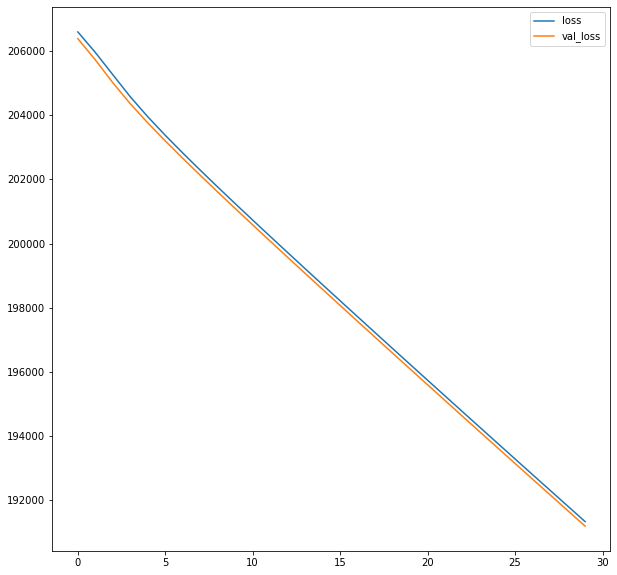

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

axs.plot(bitacora.history['loss'], label='loss')
axs.plot(bitacora.history['val_loss'], label='val_loss')

plt.legend();
plt.show();

In [65]:
ann.save('MLPModel.h5') #Guardando el modelo para futuras pruebas

## Prediccion

In [66]:
len(y_val)

469

In [67]:
y_pred = ann.predict(X_val)
np.set_printoptions(precision=2) #Para mostrar solo 2 decimales

In [68]:
from sklearn.metrics import r2_score
r2_score(y_val, y_pred)

-635.8906025721461

## Evaluando la red neuronal con cambios en hiper-parametros para elegir el mejor

In [69]:
from sklearn.model_selection import GridSearchCV
#from tf.keras.wrappers.scikit_learn import KerasClassifier

In [70]:
# Funcion que debe devolver nuestra red neuronal. Aqui se le llenan con parametros dinamicos segun lo que se necesite
def create_model(optimizer, init_mode, activation, neurons):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=neurons,  kernel_initializer=init_mode, activation=activation))
    ann.add(tf.keras.layers.Dense(units=neurons,  kernel_initializer=init_mode, activation=activation))
    ann.add(tf.keras.layers.Dense(units=1))
    ann.compile(optimizer = optimizer, loss = 'mean_squared_error') #Aca puede ir metrics = ['accuracy'] para clasificacion
    return ann

In [71]:
# definir la busqueda de parametros
batch_size = [32] #[8,16,32,64,128]
epochs = [70,100] #[10,25,50,100,150,250]
optimizer = ['adam','SGD']#['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['glorot_uniform']#['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax','relu']#['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
neurons = [5,6]
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, init_mode=init_mode, activation = activation, neurons = neurons)

In [72]:
# La siguiente linea funciona solamente para modelos de clasificacion
#modelo =  tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

#Para modelos de regresion (mi caso)
modelo =  tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)

In [73]:
grid = GridSearchCV(estimator=modelo, param_grid=param_grid, n_jobs=-1, cv=3)# Quitar scoring para problemas de clasificacion
grid_result = grid.fit(X_train, y_train)

In [74]:
# Resumen de resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -26.261920 using {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'init_mode': 'glorot_uniform', 'neurons': 6, 'optimizer': 'adam'}
-182636.239583 (445.881249) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 70, 'init_mode': 'glorot_uniform', 'neurons': 5, 'optimizer': 'adam'}
-292.248505 (4.679001) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 70, 'init_mode': 'glorot_uniform', 'neurons': 5, 'optimizer': 'SGD'}
-182644.765625 (509.706144) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 70, 'init_mode': 'glorot_uniform', 'neurons': 6, 'optimizer': 'adam'}
-291.798635 (4.636432) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 70, 'init_mode': 'glorot_uniform', 'neurons': 6, 'optimizer': 'SGD'}
-173366.260417 (784.516622) with: {'activation': 'softmax', 'batch_size': 32, 'epochs': 100, 'init_mode': 'glorot_uniform', 'neurons': 5, 'optimizer': 'adam'}
-291.588806 (4.709266) with: {'activation': 'softmax', 'batch_size': 32, 'ep

## Creando el mejor modelo de acuerdo a los resultados de GridResult

In [82]:
modeloFinal=create_model(activation='relu', init_mode='glorot_uniform', neurons=6, optimizer = 'adam')

In [83]:
bitacoraMejor = modeloFinal.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
279/279 - 0s - loss: 43737.5781 - val_loss: 329.7624
Epoch 2/100
279/279 - 0s - loss: 308.8731 - val_loss: 309.6786
Epoch 3/100
279/279 - 0s - loss: 290.6505 - val_loss: 289.0219
Epoch 4/100
279/279 - 0s - loss: 268.4599 - val_loss: 264.7848
Epoch 5/100
279/279 - 0s - loss: 243.5742 - val_loss: 238.0720
Epoch 6/100
279/279 - 0s - loss: 217.1252 - val_loss: 210.2080
Epoch 7/100
279/279 - 0s - loss: 189.2537 - val_loss: 181.6176
Epoch 8/100
279/279 - 0s - loss: 161.7946 - val_loss: 153.7017
Epoch 9/100
279/279 - 0s - loss: 135.7083 - val_loss: 128.6364
Epoch 10/100
279/279 - 0s - loss: 112.1323 - val_loss: 104.0754
Epoch 11/100
279/279 - 0s - loss: 91.5735 - val_loss: 84.2535
Epoch 12/100
279/279 - 0s - loss: 74.0997 - val_loss: 67.7498
Epoch 13/100
279/279 - 0s - loss: 60.9339 - val_loss: 55.3388
Epoch 14/100
279/279 - 0s - loss: 51.1488 - val_loss: 46.6537
Epoch 15/100
279/279 - 0s - loss: 44.4291 - val_loss: 40.2641
Epoch 16/100
279/279 - 0s - loss: 40.0722 - val_loss: 36.

## Mostrando grafico de la media cuadrada del error

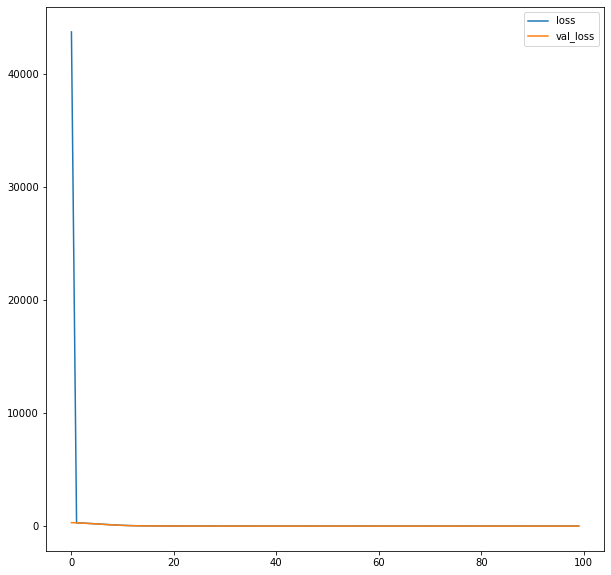

In [84]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

axs.plot(bitacoraMejor.history['loss'], label='loss')
axs.plot(bitacoraMejor.history['val_loss'], label='val_loss')

plt.legend();
plt.show();

En el grafico vemos que la solucion obtenida con GridSearch nos brinda una solucion optima entre las evaluadas pues converge muy rapido el error.

## Prediccion en dataset de test

In [85]:
#Prediccion final
y_pred2 = modeloFinal.predict(X_test)

In [86]:
#Evaluacion del modelo
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.899633885900911

Tiene un R2 de 0.89 en el dataset de test. Este dato esta arriba del limite solicitado por lo que se cumple el requerimiento.

In [87]:
modeloFinal.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  30        
_________________________________________________________________
dense_19 (Dense)             multiple                  42        
_________________________________________________________________
dense_20 (Dense)             multiple                  7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [88]:
modeloFinal.save('MejorMLPModel.h5') #Guardando el modelo para futuras pruebas